# Revisão de código - UFV CJ1

Notebook revisado para aplicação no site streamlit.

In [ ]:
# Instalando pacote watermark
!pip install -q -U watermark

In [ ]:
# Versão da Linguagem Python
from platform import python_version
print("Versão da Linguagem Python usada neste Colab Notebook:", python_version())

Versão da Linguagem Python usada neste Colab Notebook: 3.10.12


In [ ]:
# Carregando os pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import sklearn
import seaborn as sns
import yellowbrick
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [ ]:
# Versão dos pacotes usados neste Colab Notebook
%reload_ext watermark
%watermark -a 'Analista de dados - Alexsander Maia Simas' --iversion

Author: Analista de dados - Alexsander Maia Simas

sklearn    : 1.5.2
pandas     : 2.2.2
matplotlib : 3.7.1
plotly     : 5.24.1
yellowbrick: 1.5
seaborn    : 0.13.2
platform   : 1.0.8
numpy      : 1.26.4



In [ ]:
# Dados coletados do dia 01/06/2023 até 06/10/2024 usina de CJ1
dados_CJ1 = pd.read_csv('/content/dados_coletados_CJ1_ano.csv', sep=';')
dados_CJ1.head()

Date (-03:00)  (W/m²)  Inversor A02 - (W)  Inversor B03 - (W)  \
0  01/06/2023 00:05:00     NaN                 0.0                 0.0   
1  01/06/2023 00:10:00     NaN                 0.0                 0.0   
2  01/06/2023 00:15:00     NaN                 0.0                 0.0   
3  01/06/2023 00:20:00     NaN                 0.0                 0.0   
4  01/06/2023 00:25:00     NaN                 0.0                 0.0   

   Inversor C01 - (W)  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [ ]:
dados_CJ1.columns = (['Data', 'Solar Irradiation (W/m²)', 'INV A2 - Producao (W)', 'INV B3 - Producao (W)', 'INV C1 - Producao (W)'])
dados_CJ1.head()

Data  Solar Irradiation (W/m²)  INV A2 - Producao (W)  \
0  01/06/2023 00:05:00                       NaN                    0.0   
1  01/06/2023 00:10:00                       NaN                    0.0   
2  01/06/2023 00:15:00                       NaN                    0.0   
3  01/06/2023 00:20:00                       NaN                    0.0   
4  01/06/2023 00:25:00                       NaN                    0.0   

   INV B3 - Producao (W)  INV C1 - Producao (W)  
0                    0.0                    0.0  
1                    0.0                    0.0  
2                    0.0                    0.0  
3                    0.0                    0.0  
4                    0.0                    0.0

In [ ]:
def dividir_string(texto):
  dia = texto[:10]
  hora = texto[11:19]
  return dia, hora

In [ ]:
dados_CJ1[['dia', 'hora']] = dados_CJ1['Data'].apply(lambda x: pd.Series(dividir_string(x)))
dados_CJ1.head()

Data  Solar Irradiation (W/m²)  INV A2 - Producao (W)  \
0  01/06/2023 00:05:00                       NaN                    0.0   
1  01/06/2023 00:10:00                       NaN                    0.0   
2  01/06/2023 00:15:00                       NaN                    0.0   
3  01/06/2023 00:20:00                       NaN                    0.0   
4  01/06/2023 00:25:00                       NaN                    0.0   

   INV B3 - Producao (W)  INV C1 - Producao (W)         dia      hora  
0                    0.0                    0.0  01/06/2023  00:05:00  
1                    0.0                    0.0  01/06/2023  00:10:00  
2                    0.0                    0.0  01/06/2023  00:15:00  
3                    0.0                    0.0  01/06/2023  00:20:00  
4                    0.0                    0.0  01/06/2023  00:25:00

In [ ]:
filtro_hora = (dados_CJ1['hora'] >= ('00:00:00')) & (dados_CJ1['hora'] <= ('05:55:00'))
filtro_hora_noturna = (dados_CJ1['hora'] >= ('18:05:00')) & (dados_CJ1['hora'] <= ('23:55:00'))

In [ ]:
dados_CJ1 = dados_CJ1.drop(dados_CJ1[filtro_hora].index)
dados_CJ1 = dados_CJ1.drop(dados_CJ1[filtro_hora_noturna].index)

<ipython-input-10-5b2821297e4d>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dados_CJ1 = dados_CJ1.drop(dados_CJ1[filtro_hora_noturna].index)


In [ ]:
dados_CJ1.head()

Data  Solar Irradiation (W/m²)  INV A2 - Producao (W)  \
71  01/06/2023 06:00:00                       NaN                    0.0   
72  01/06/2023 06:05:00                       NaN                    0.0   
73  01/06/2023 06:10:00                       NaN                    0.0   
74  01/06/2023 06:15:00                       NaN                    0.0   
75  01/06/2023 06:20:00                       NaN                  275.0   

    INV B3 - Producao (W)  INV C1 - Producao (W)         dia      hora  
71                    0.0                    0.0  01/06/2023  06:00:00  
72                    0.0                    0.0  01/06/2023  06:05:00  
73                    0.0                    0.0  01/06/2023  06:10:00  
74                    0.0                    0.0  01/06/2023  06:15:00  
75                  323.0                  367.0  01/06/2023  06:20:00

In [ ]:
dados_CJ1.reset_index(drop=True)

Data  Solar Irradiation (W/m²)  INV A2 - Producao (W)  \
0      01/06/2023 06:00:00                       NaN                    0.0   
1      01/06/2023 06:05:00                       NaN                    0.0   
2      01/06/2023 06:10:00                       NaN                    0.0   
3      01/06/2023 06:15:00                       NaN                    0.0   
4      01/06/2023 06:20:00                       NaN                  275.0   
...                    ...                       ...                    ...   
71625  06/10/2024 17:40:00                   17.0700                 1249.0   
71626  06/10/2024 17:45:00                    9.9012                  884.0   
71627  06/10/2024 17:50:00                    4.2228                  508.0   
71628  06/10/2024 17:55:00                    0.3000                   54.0   
71629  06/10/2024 18:00:00                    0.0000                    0.0   

       INV B3 - Producao (W)  INV C1 - Producao (W)         dia      hora  
0                        0.0                    0.0  01/06/2023  06:00:00  
1                        0.0                    0.0  01/06/2023  06:05:00  
2                        0.0                    0.0  01/06/2023  06:10:00  
3                        0.0                    0.0  01/06/2023  06:15:00  
4                      323.0                  367.0  01/06/2023  06:20:00  
...                      ...                    ...         ...       ...  
71625                 1348.0                 1510.0  06/10/2024  17:40:00  
71626                  947.0                 1037.0  06/10/2024  17:45:00  
71627                  532.0                  625.0  06/10/2024  17:50:00  
71628                    0.0                  173.0  06/10/2024  17:55:00  
71629                    0.0                    0.0  06/10/2024  18:00:00  

[71630 rows x 7 columns]

### Tratando dados Nulos e/ou zerados

In [ ]:
dados_CJ1.isna().sum()

Data                           0
Solar Irradiation (W/m²)    1595
INV A2 - Producao (W)         15
INV B3 - Producao (W)         16
INV C1 - Producao (W)         15
dia                            0
hora                           0
dtype: int64

In [ ]:
dados_CJ1.dropna(inplace=True)

In [ ]:
dados_CJ1.isna().sum()

Data                        0
Solar Irradiation (W/m²)    0
INV A2 - Producao (W)       0
INV B3 - Producao (W)       0
INV C1 - Producao (W)       0
dia                         0
hora                        0
dtype: int64

In [ ]:
dados_CJ1.describe().round(2)

Solar Irradiation (W/m²)  INV A2 - Producao (W)  INV B3 - Producao (W)  \
count                  70019.00               70019.00               70019.00   
mean                     546.93               62473.72               62407.39   
std                      383.59               37310.77               38043.80   
min                        0.00                   0.00                   0.00   
25%                      153.00               26154.00               24819.00   
50%                      643.48               79482.00               80924.00   
75%                      892.00               99230.50               99941.00   
max                     1200.00              105000.00              105000.00   

       INV C1 - Producao (W)  
count               70019.00  
mean                60483.49  
std                 37844.85  
min                     0.00  
25%                 22611.00  
50%                 75570.00  
75%                 97338.50  
max                105000.00

###  Análise preliminar e estatística

In [ ]:
fig = go.Figure()

# Adicionando o boxplot ao gráfico Plotly
fig.add_trace(go.Box(y=dados_CJ1['INV A2 - Producao (W)'],
                     boxpoints='outliers',  # Mostrar outliers
                     marker_color='blue',  # Cor dos marcadores
                     line_color='gold'))  # Cor das linhas do boxplot

# Configurando o layout do gráfico Plotly
fig.update_layout(title='Distribuição da produção do INV A2 em CJ1',
                  xaxis_title='Produção (W)',
                  yaxis_title='',
                  template='plotly_white')  # Estilo do template

# Exibindo o gráfico Plotly
fig.show()

In [ ]:
fig = go.Figure()

# Adicionando o boxplot ao gráfico Plotly
fig.add_trace(go.Box(y=dados_CJ1['INV B3 - Producao (W)'],
                     boxpoints='outliers',  # Mostrar outliers
                     marker_color='blue',  # Cor dos marcadores
                     line_color='blue'))  # Cor das linhas do boxplot

# Configurando o layout do gráfico Plotly
fig.update_layout(title='Distribuição da produção do INV B3 em CJ1',
                  xaxis_title='Produção (W)',
                  yaxis_title='',
                  template='plotly_white')  # Estilo do template

# Exibindo o gráfico Plotly
fig.show()

In [ ]:
fig = go.Figure()

# Adicionando o boxplot ao gráfico Plotly
fig.add_trace(go.Box(y=dados_CJ1['INV C1 - Producao (W)'],
                     boxpoints='outliers',  # Mostrar outliers
                     marker_color='blue',  # Cor dos marcadores
                     line_color='darkcyan'))  # Cor das linhas do boxplot

# Configurando o layout do gráfico Plotly
fig.update_layout(title='Distribuição da produção do INV C1 em CJ1',
                  xaxis_title='Produção (W)',
                  yaxis_title='',
                  template='plotly_white')  # Estilo do template

# Exibindo o gráfico Plotly
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=dados_CJ1['INV A2 - Producao (W)'],
                         y=dados_CJ1['Solar Irradiation (W/m²)'],
                         mode='markers', marker=dict(size=6,opacity=0.6, color='orange')))
fig.update_layout(title='Gráfico de distribuição',
                  xaxis_title='Produção do inversor A2',
                  yaxis_title='POA')
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=dados_CJ1['INV B3 - Producao (W)'],
                         y=dados_CJ1['Solar Irradiation (W/m²)'],
                         mode='markers', marker=dict(size=6,opacity=0.6, color='blue')))
fig.update_layout(title='Gráfico de distribuição',
                  xaxis_title='Produção do inversor B3',
                  yaxis_title='POA')
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=dados_CJ1['INV C1 - Producao (W)'],
                         y=dados_CJ1['Solar Irradiation (W/m²)'],
                         mode='markers', marker=dict(size=6,opacity=0.6, color='darkcyan')))
fig.update_layout(title='Gráfico de distribuição',
                  xaxis_title='Produção do inversor C1',
                  yaxis_title='POA')
fig.show()

Se faz necessário uma limpeza destes dados de produção para que o nosso modelo não se torne tendencioso.

### Limpeza dos dados e remoção de outliers

In [ ]:
from scipy.stats import chi2
from scipy.spatial import distance

#### Limpeza dos dados do inversor A2

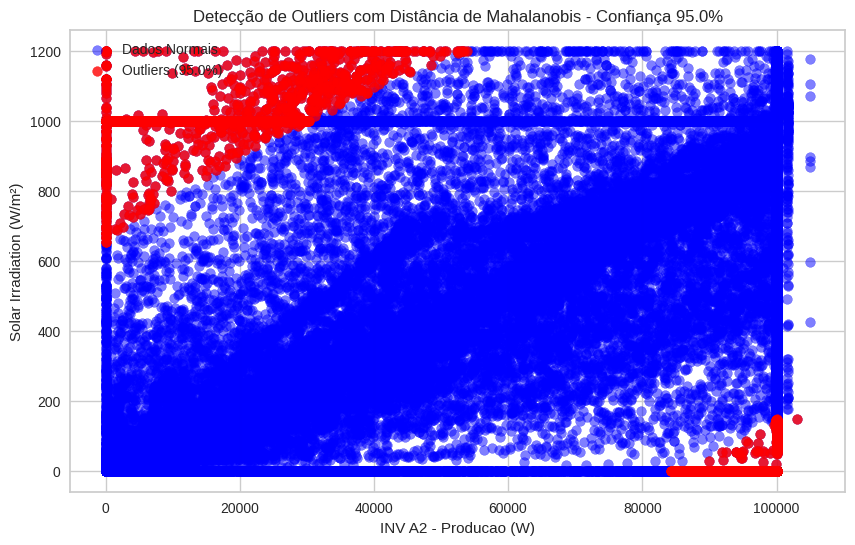

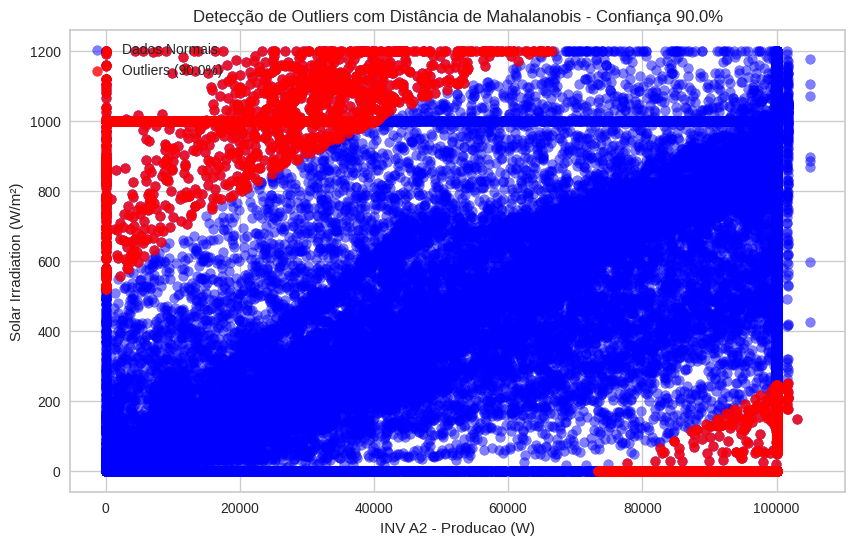

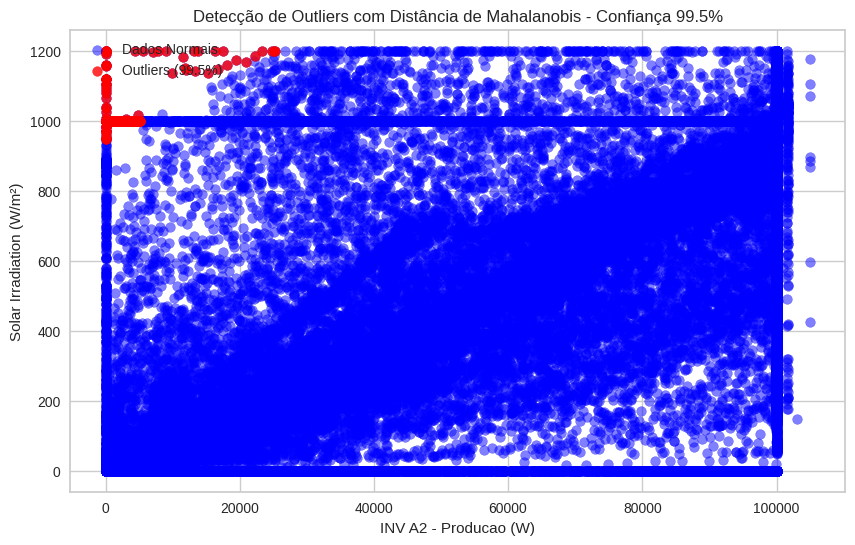

In [ ]:
# Calcular a matriz de covariância e a média dos dados
cov_matrix = np.cov(dados_CJ1[['INV A2 - Producao (W)', 'Solar Irradiation (W/m²)']], rowvar=False)
inv_cov_matrix = np.linalg.inv(cov_matrix)
mean_vals = np.mean(dados_CJ1[['INV A2 - Producao (W)', 'Solar Irradiation (W/m²)']], axis=0)

# Calcular a Distância Mahalanobis para cada ponto
dados_CJ1['mahala_A2'] = dados_CJ1[['INV A2 - Producao (W)', 'Solar Irradiation (W/m²)']].apply(lambda x: distance.mahalanobis(x, mean_vals, inv_cov_matrix), axis=1)

# Ajustando diferentes níveis de confiança para análise
nivel_confianca = [0.95, 0.90, 0.995]

for nc in nivel_confianca:
    threshold = chi2.ppf(nc, df=2)
    dados_CJ1['outlier_A2'] = dados_CJ1['mahala_A2'] > np.sqrt(threshold)

    # Plotando os resultados para cada nível de confiança
    plt.figure(figsize=(10, 6))
    plt.scatter(dados_CJ1['INV A2 - Producao (W)'], dados_CJ1['Solar Irradiation (W/m²)'], color='blue', alpha=0.5, label='Dados Normais')
    plt.scatter(dados_CJ1.loc[dados_CJ1['outlier_A2'], 'INV A2 - Producao (W)'], dados_CJ1.loc[dados_CJ1['outlier_A2'], 'Solar Irradiation (W/m²)'], color='red', alpha=0.8, label=f'Outliers ({nc*100}%)')

    plt.xlabel('INV A2 - Producao (W)')
    plt.ylabel('Solar Irradiation (W/m²)')
    plt.title(f'Detecção de Outliers com Distância de Mahalanobis - Confiança {nc*100}%')
    plt.legend()
    plt.show()

In [ ]:
# Definindo o threshold com base em um nível de confiança de 90%
nivel_confianca = 0.90
threshold = chi2.ppf(nivel_confianca, df=2)
dados_CJ1['outlier_A2'] = dados_CJ1['mahala_A2'] > np.sqrt(threshold)

# Criando o novo DataFrame sem os outliers
dados_CJ1 = dados_CJ1[~dados_CJ1['outlier_A2']].copy()

# Removendo registros onde Power-AC-W é maior que 38 e POA é 0
dados_CJ1 = dados_CJ1[~((dados_CJ1['INV A2 - Producao (W)'] > 38) & (dados_CJ1['Solar Irradiation (W/m²)'] == 0))]

# vamos plotar a distribuição pra ver como ficou
fig = go.Figure()
fig.add_trace(go.Scatter(x=dados_CJ1['INV A2 - Producao (W)'],
                         y=dados_CJ1['Solar Irradiation (W/m²)'],
                         mode='markers', marker=dict(size=6,opacity=0.6, color='orange')))
fig.update_layout(title='Gráfico de distribuição',
                  xaxis_title='Produção do inversor A2',
                  yaxis_title='POA')
fig.show()

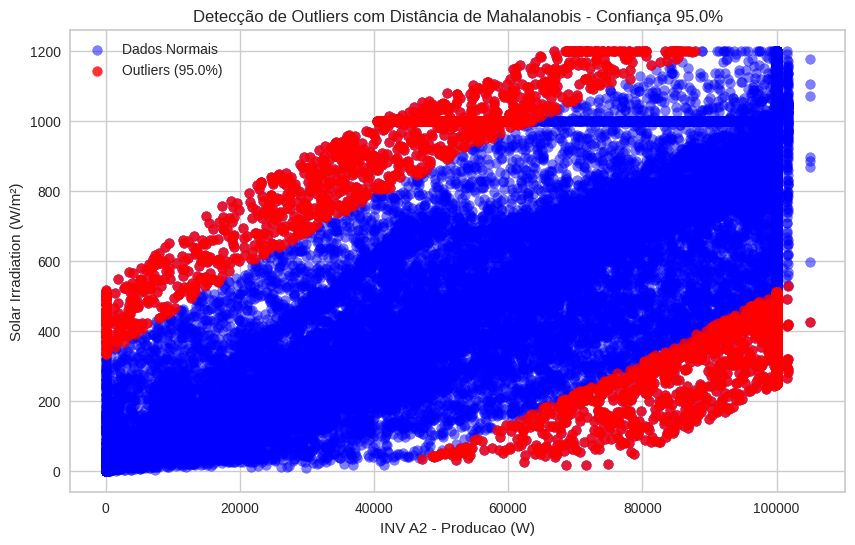

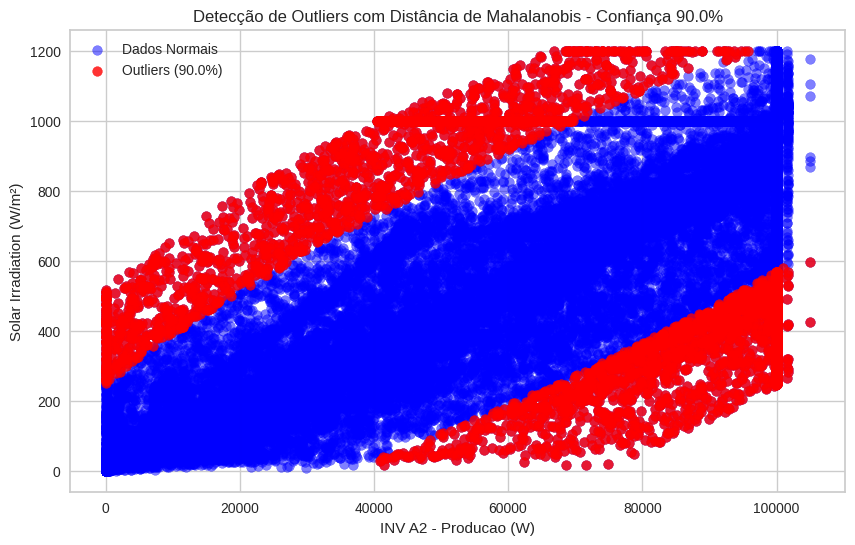

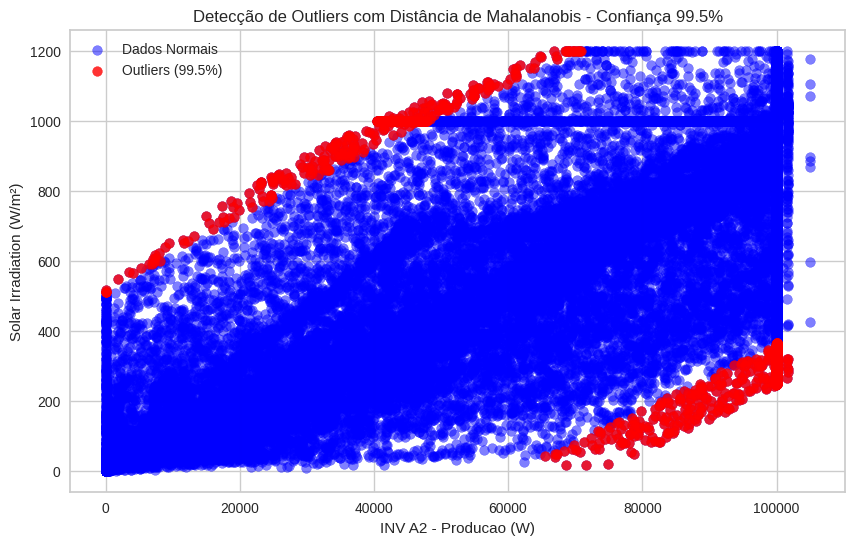

In [ ]:
# Calcular a matriz de covariância e a média dos dados
cov_matrix = np.cov(dados_CJ1[['INV A2 - Producao (W)', 'Solar Irradiation (W/m²)']], rowvar=False)
inv_cov_matrix = np.linalg.inv(cov_matrix)
mean_vals = np.mean(dados_CJ1[['INV A2 - Producao (W)', 'Solar Irradiation (W/m²)']], axis=0)

# Calcular a Distância Mahalanobis para cada ponto
dados_CJ1['mahala_A2'] = dados_CJ1[['INV A2 - Producao (W)', 'Solar Irradiation (W/m²)']].apply(lambda x: distance.mahalanobis(x, mean_vals, inv_cov_matrix), axis=1)

# Ajustando diferentes níveis de confiança para análise
nivel_confianca = [0.95, 0.90, 0.995]

for nc in nivel_confianca:
    threshold = chi2.ppf(nc, df=2)
    dados_CJ1['outlier_A2'] = dados_CJ1['mahala_A2'] > np.sqrt(threshold)

    # Plotando os resultados para cada nível de confiança
    plt.figure(figsize=(10, 6))
    plt.scatter(dados_CJ1['INV A2 - Producao (W)'], dados_CJ1['Solar Irradiation (W/m²)'], color='blue', alpha=0.5, label='Dados Normais')
    plt.scatter(dados_CJ1.loc[dados_CJ1['outlier_A2'], 'INV A2 - Producao (W)'], dados_CJ1.loc[dados_CJ1['outlier_A2'], 'Solar Irradiation (W/m²)'], color='red', alpha=0.8, label=f'Outliers ({nc*100}%)')

    plt.xlabel('INV A2 - Producao (W)')
    plt.ylabel('Solar Irradiation (W/m²)')
    plt.title(f'Detecção de Outliers com Distância de Mahalanobis - Confiança {nc*100}%')
    plt.legend()
    plt.show()

In [ ]:
# Definindo o threshold com base em um nível de confiança de 90%
nivel_confianca = 0.995
threshold = chi2.ppf(nivel_confianca, df=2)
dados_CJ1['outlier_A2'] = dados_CJ1['mahala_A2'] > np.sqrt(threshold)

# Criando o novo DataFrame sem os outliers
dados_CJ1 = dados_CJ1[~dados_CJ1['outlier_A2']].copy()

# Removendo registros onde Power-AC-W é maior que 38 e POA é 0
dados_CJ1 = dados_CJ1[~((dados_CJ1['INV A2 - Producao (W)'] > 350) & (dados_CJ1['Solar Irradiation (W/m²)'] == 0))]

# vamos plotar a distribuição pra ver como ficou
fig = go.Figure()
fig.add_trace(go.Scatter(x=dados_CJ1['INV A2 - Producao (W)'],
                         y=dados_CJ1['Solar Irradiation (W/m²)'],
                         mode='markers', marker=dict(size=6,opacity=0.6, color='orange')))
fig.update_layout(title='Gráfico de distribuição',
                  xaxis_title='Produção do inversor A2',
                  yaxis_title='POA')
fig.show()

#### Limpeza dos dados do inversor B3

In [ ]:
# Calcular a matriz de covariância e a média dos dados
cov_matrix = np.cov(dados_CJ1[['INV B3 - Producao (W)', 'Solar Irradiation (W/m²)']], rowvar=False)
inv_cov_matrix = np.linalg.inv(cov_matrix)
mean_vals = np.mean(dados_CJ1[['INV B3 - Producao (W)', 'Solar Irradiation (W/m²)']], axis=0)

# Calcular a Distância Mahalanobis para cada ponto
dados_CJ1['mahala_B3'] = dados_CJ1[['INV B3 - Producao (W)', 'Solar Irradiation (W/m²)']].apply(lambda x: distance.mahalanobis(x, mean_vals, inv_cov_matrix), axis=1)

# Ajustando diferentes níveis de confiança para análise
nivel_confianca = [0.95, 0.90, 0.995]

for nc in nivel_confianca:
    threshold = chi2.ppf(nc, df=2)
    dados_CJ1['outlier_B3'] = dados_CJ1['mahala_B3'] > np.sqrt(threshold)

    # Plotando os resultados para cada nível de confiança
    plt.figure(figsize=(10, 6))
    plt.scatter(dados_CJ1['INV B3 - Producao (W)'], dados_CJ1['Solar Irradiation (W/m²)'], color='blue', alpha=0.5, label='Dados Normais')
    plt.scatter(dados_CJ1.loc[dados_CJ1['outlier_B3'], 'INV B3 - Producao (W)'], dados_CJ1.loc[dados_CJ1['outlier_B3'], 'Solar Irradiation (W/m²)'], color='red', alpha=0.8, label=f'Outliers ({nc*100}%)')

    plt.xlabel('INV B3 - Producao (W)')
    plt.ylabel('Solar Irradiation (W/m²)')
    plt.title(f'Detecção de Outliers com Distância de Mahalanobis - Confiança {nc*100}%')
    plt.legend()
    plt.show()

In [ ]:
# Definindo o threshold com base em um nível de confiança de 90%
nivel_confianca = 0.995
threshold = chi2.ppf(nivel_confianca, df=2)
dados_CJ1['outlier_B3'] = dados_CJ1['mahala_B3'] > np.sqrt(threshold)

# Criando o novo DataFrame sem os outliers
dados_CJ1 = dados_CJ1[~dados_CJ1['outlier_B3']].copy()

# Removendo registros onde Power-AC-W é maior que 38 e POA é 0
dados_CJ1 = dados_CJ1[~((dados_CJ1['INV B3 - Producao (W)'] > 38) & (dados_CJ1['Solar Irradiation (W/m²)'] == 0))]

# Vamos criar o gráfico para ver o resultado
fig = go.Figure()
fig.add_trace(go.Scatter(x=dados_CJ1['INV B3 - Producao (W)'],
                         y=dados_CJ1['Solar Irradiation (W/m²)'],
                         mode='markers', marker=dict(size=6,opacity=0.6, color='darkblue')))
fig.update_layout(title='Gráfico de distribuição',
                  xaxis_title='Produção do inversor B3',
                  yaxis_title='POA')
fig.show()

#### Limpeza dos dados do inversor C1

In [ ]:
# Calcular a matriz de covariância e a média dos dados
cov_matrix = np.cov(dados_CJ1[['INV C1 - Producao (W)', 'Solar Irradiation (W/m²)']], rowvar=False)
inv_cov_matrix = np.linalg.inv(cov_matrix)
mean_vals = np.mean(dados_CJ1[['INV C1 - Producao (W)', 'Solar Irradiation (W/m²)']], axis=0)

# Calcular a Distância Mahalanobis para cada ponto
dados_CJ1['mahala_C1'] = dados_CJ1[['INV C1 - Producao (W)', 'Solar Irradiation (W/m²)']].apply(lambda x: distance.mahalanobis(x, mean_vals, inv_cov_matrix), axis=1)

# Ajustando diferentes níveis de confiança para análise
nivel_confianca = [0.95, 0.90, 0.995]

for nc in nivel_confianca:
    threshold = chi2.ppf(nc, df=2)
    dados_CJ1['outlier_C1'] = dados_CJ1['mahala_C1'] > np.sqrt(threshold)

    # Plotando os resultados para cada nível de confiança
    plt.figure(figsize=(10, 6))
    plt.scatter(dados_CJ1['INV C1 - Producao (W)'], dados_CJ1['Solar Irradiation (W/m²)'], color='blue', alpha=0.5, label='Dados Normais')
    plt.scatter(dados_CJ1.loc[dados_CJ1['outlier_C1'], 'INV C1 - Producao (W)'], dados_CJ1.loc[dados_CJ1['outlier_C1'], 'Solar Irradiation (W/m²)'], color='red', alpha=0.8, label=f'Outliers ({nc*100}%)')

    plt.xlabel('INV C1 - Producao (W)')
    plt.ylabel('Solar Irradiation (W/m²)')
    plt.title(f'Detecção de Outliers com Distância de Mahalanobis - Confiança {nc*100}%')
    plt.legend()
    plt.show()

In [ ]:
# Definindo o threshold com base em um nível de confiança de 90%
nivel_confianca = 0.995
threshold = chi2.ppf(nivel_confianca, df=2)
dados_CJ1['outlier_C1'] = dados_CJ1['mahala_C1'] > np.sqrt(threshold)

# Criando o novo DataFrame sem os outliers
dados_CJ1 = dados_CJ1[~dados_CJ1['outlier_C1']].copy()

# Removendo registros onde Power-AC-W é maior que 38 e POA é 0
dados_CJ1 = dados_CJ1[~((dados_CJ1['INV C1 - Producao (W)'] > 38) & (dados_CJ1['Solar Irradiation (W/m²)'] == 0))]

# Vamos criar o gráfico para ver o resultado
fig = go.Figure()
fig.add_trace(go.Scatter(x=dados_CJ1['INV C1 - Producao (W)'],
                         y=dados_CJ1['Solar Irradiation (W/m²)'],
                         mode='markers', marker=dict(size=6,opacity=0.6, color='green')))
fig.update_layout(title='Gráfico de distribuição',
                  xaxis_title='Produção do inversor C1',
                  yaxis_title='POA')
fig.show()

Limpeza dos dados, realizada e estão prontos para o treinamento.

### Análise de Correlaçãos dos dados

In [ ]:
# Calculando a matriz de correlação
corr_limpos = dados_CJ1[['INV A2 - Producao (W)','INV B3 - Producao (W)', 'INV C1 - Producao (W)', 'Solar Irradiation (W/m²)']].corr()

# Configurando o tamanho da figura
plt.figure(figsize=(8, 6))

# Criando o heatmap
sns.heatmap(corr_limpos, annot=True, fmt=".4f", cmap='coolwarm', cbar_kws={'label': 'Coeficiente de Correlação com os Dados Limpos'})

# Adicionando títulos e labels
plt.title('Matriz de Correlação')
plt.show()

### Limpeza e separação dos dados antes da etapa de treinamento

In [ ]:
dados_CJ1.head()

Data  Solar Irradiation (W/m²)  INV A2 - Producao (W)  \
3239  12/06/2023 06:00:00                    0.0000                    0.0   
3240  12/06/2023 06:05:00                    0.0000                    0.0   
3241  12/06/2023 06:10:00                    0.0000                    0.0   
3243  12/06/2023 06:20:00                    1.6094                  354.0   
3244  12/06/2023 06:25:00                    4.7812                  706.0   

      INV B3 - Producao (W)  INV C1 - Producao (W)         dia      hora  \
3239                    0.0                    0.0  12/06/2023  06:00:00   
3240                    0.0                    0.0  12/06/2023  06:05:00   
3241                    0.0                    0.0  12/06/2023  06:10:00   
3243                  380.0                  480.0  12/06/2023  06:20:00   
3244                  743.0                  852.0  12/06/2023  06:25:00   

      mahala_A2  outlier_A2  mahala_B3  outlier_B3  mahala_C1  outlier_C1  
3239   1.759467       False   1.725708       False   1.702460       False  
3240   1.759467       False   1.725708       False   1.702460       False  
3241   1.759467       False   1.725708       False   1.702460       False  
3243   1.750995       False   1.717537       False   1.693374       False  
3244   1.741362       False   1.707914       False   1.683627       False

In [ ]:
# Antes de seguir para a próxima etapa, vamos tirar as colunas mahal e outlier e salvar em outro dataframe
dados_CJ1 = dados_CJ1.drop(['dia','hora','mahala_A2', 'outlier_A2', 'mahala_B3', 'outlier_B3','mahala_C1', 'outlier_C1'], axis = 1)
dados_CJ1.head()

Data  Solar Irradiation (W/m²)  INV A2 - Producao (W)  \
3239  12/06/2023 06:00:00                    0.0000                    0.0   
3240  12/06/2023 06:05:00                    0.0000                    0.0   
3241  12/06/2023 06:10:00                    0.0000                    0.0   
3243  12/06/2023 06:20:00                    1.6094                  354.0   
3244  12/06/2023 06:25:00                    4.7812                  706.0   

      INV B3 - Producao (W)  INV C1 - Producao (W)  
3239                    0.0                    0.0  
3240                    0.0                    0.0  
3241                    0.0                    0.0  
3243                  380.0                  480.0  
3244                  743.0                  852.0

In [ ]:
dados_CJ1 = dados_CJ1.drop(['Data'], axis=1)
dados_CJ1.head()

Solar Irradiation (W/m²)  INV A2 - Producao (W)  INV B3 - Producao (W)  \
3239                    0.0000                    0.0                    0.0   
3240                    0.0000                    0.0                    0.0   
3241                    0.0000                    0.0                    0.0   
3243                    1.6094                  354.0                  380.0   
3244                    4.7812                  706.0                  743.0   

      INV C1 - Producao (W)  
3239                    0.0  
3240                    0.0  
3241                    0.0  
3243                  480.0  
3244                  852.0

In [ ]:
dados_CJ1 = dados_CJ1.reset_index(drop=True)
dados_CJ1

Solar Irradiation (W/m²)  INV A2 - Producao (W)  INV B3 - Producao (W)  \
0                        0.0000                    0.0                    0.0   
1                        0.0000                    0.0                    0.0   
2                        0.0000                    0.0                    0.0   
3                        1.6094                  354.0                  380.0   
4                        4.7812                  706.0                  743.0   
...                         ...                    ...                    ...   
57820                   17.0700                 1249.0                 1348.0   
57821                    9.9012                  884.0                  947.0   
57822                    4.2228                  508.0                  532.0   
57823                    0.3000                   54.0                    0.0   
57824                    0.0000                    0.0                    0.0   

       INV C1 - Producao (W)  
0                        0.0  
1                        0.0  
2                        0.0  
3                      480.0  
4                      852.0  
...                      ...  
57820                 1510.0  
57821                 1037.0  
57822                  625.0  
57823                  173.0  
57824                    0.0  

[57825 rows x 4 columns]

### Aplicando modelos resistentes a dados assimétricos

In [ ]:
# Separando em coluna de explicação ou variaveis explicativas (X)
# E coluna alvo ou coluna target (y)

X = dados_CJ1[['INV A2 - Producao (W)', 'INV B3 - Producao (W)', 'INV C1 - Producao (W)']]
y= dados_CJ1['Solar Irradiation (W/m²)']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=7)

In [ ]:
def calcular_metricas_regressao(y_test, y_pred):

  rmse = mean_squared_error(y_test, y_pred, squared=False)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  # Calcular acurácia em porcentagem para R²
  acuracia_r2 = r2 * 100

  # Calcular acurácia em porcentagem para MSE
  acuracia_mse = (1 - rmse / np.var(y_test)) * 100

  metricas = {
      'Raiz do erro quadrático médio': round(rmse, 4),
      'Erro Absoluto médio': round(mae, 4),
      'R2 Score': round(r2, 4),
      'Acurácia (R²)':"{}%".format(round(acuracia_r2, 4)),
      'Acurácia MSE':"{}%".format(round(acuracia_mse, 4))
  }

  return metricas

#### XGBoost

In [ ]:
from xgboost import XGBRegressor
modelo_xgboost = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1)
resultado_xgboost = modelo_xgboost.fit(X_train, y_train)
y_pred_xgboost = resultado_xgboost.predict(X_test)
calcular_metricas_regressao(y_test, y_pred_xgboost)

{'Raiz do erro quadrático médio': 132.7088,
 'Erro Absoluto médio': 85.354,
 'R2 Score': 0.8619,
 'Acurácia (R²)': '86.1908%',
 'Acurácia MSE': '99.8959%'}

#### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(max_depth=5, random_state=7)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
calcular_metricas_regressao(y_test, y_pred_rf)

{'Raiz do erro quadrático médio': 135.101,
 'Erro Absoluto médio': 87.4337,
 'R2 Score': 0.8569,
 'Acurácia (R²)': '85.6884%',
 'Acurácia MSE': '99.8941%'}

### Testando o modelo XGBoost

In [ ]:
dados_teste_inversores_Cj1 = pd.read_csv('/content/export_analysis_168703_resolution_instant_2024-10-17_14-52-01.csv', sep=';')
dados_teste_inversores_Cj1.head()

Date (-03:00)  (W/m²)  Inversor A02 - (W)  Inversor B03 - (W)  \
0  16/10/2024 00:05:00     0.0                 0.0                 0.0   
1  16/10/2024 00:10:00     0.0                 0.0                 0.0   
2  16/10/2024 00:15:00     0.0                 0.0                 0.0   
3  16/10/2024 00:20:00     0.0                 0.0                 0.0   
4  16/10/2024 00:25:00     0.0                 0.0                 0.0   

   Inversor C01 - (W)  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [ ]:
dados_teste_inversores_Cj1.columns = (['Data', 'Solar Irradiation (W/m²)', 'INV A2 - Producao (W)', 'INV B3 - Producao (W)', 'INV C1 - Producao (W)'])
dados_teste_inversores_Cj1.head()

Data  Solar Irradiation (W/m²)  INV A2 - Producao (W)  \
0  16/10/2024 00:05:00                       0.0                    0.0   
1  16/10/2024 00:10:00                       0.0                    0.0   
2  16/10/2024 00:15:00                       0.0                    0.0   
3  16/10/2024 00:20:00                       0.0                    0.0   
4  16/10/2024 00:25:00                       0.0                    0.0   

   INV B3 - Producao (W)  INV C1 - Producao (W)  
0                    0.0                    0.0  
1                    0.0                    0.0  
2                    0.0                    0.0  
3                    0.0                    0.0  
4                    0.0                    0.0

In [ ]:
dados_teste_inversores_Cj1['Data'] = pd.to_datetime(dados_teste_inversores_Cj1['Data'], format='%d/%m/%Y %H:%M:%S')
dados_teste_inversores_Cj1.set_index('Data', inplace=True)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=dados_teste_inversores_Cj1.index, y=dados_teste_inversores_Cj1['Solar Irradiation (W/m²)'], mode='lines', name='Solar Irradiation Robust (W/m²)', line=dict(color='orange') ))
fig.add_trace(go.Scatter(x=dados_teste_inversores_Cj1.index, y=dados_teste_inversores_Cj1['INV A2 - Producao (W)'], mode='lines', name='AC Power - Inverter reading (W)', yaxis='y2', line=dict(color='blue')))
fig.update_layout(title='Solar Irradiation Robust (W/m²) x AC Power - Inverter reading (W)',
                  xaxis_title='Data',
                  yaxis_title='Valores',
                  yaxis=dict(title='Solar Irradiation Robust (W/m²)', side='left'),
                  yaxis2=dict(title='Produção', overlaying='y', side='right', position=0.98))
fig.show()

In [ ]:
X_valida = dados_teste_inversores_Cj1[['INV A2 - Producao (W)', 'INV B3 - Producao (W)', 'INV C1 - Producao (W)']]

dados_teste_inversores_Cj1['POA_pred'] = modelo_xgboost.predict(X_valida)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=dados_teste_inversores_Cj1.index, y=dados_teste_inversores_Cj1['Solar Irradiation (W/m²)'], mode='lines', name='Solar Irradiation Robust (W/m²)', line=dict(color='orange') ))
fig.add_trace(go.Scatter(x=dados_teste_inversores_Cj1.index, y=dados_teste_inversores_Cj1['INV A2 - Producao (W)'], mode='lines', name='INV A1 - Producao (W)', yaxis='y2', line=dict(color='magenta')))
fig.add_trace(go.Scatter(x=dados_teste_inversores_Cj1.index, y=dados_teste_inversores_Cj1['INV B3 - Producao (W)'], mode='lines', name='INV B1 - Producao (W)', yaxis='y3', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=dados_teste_inversores_Cj1.index, y=dados_teste_inversores_Cj1['INV C1 - Producao (W)'], mode='lines', name='INV C1 - Producao (W)', yaxis='y4', line=dict(color='darkgreen')))
fig.add_trace(go.Scatter(x=dados_teste_inversores_Cj1.index, y=dados_teste_inversores_Cj1['POA_pred'], mode='lines', name='POA_Pred', yaxis='y5', line=dict(color='green')))
fig.update_layout(title='Previsão da Irradiação x Produção dos inversores',
                  xaxis_title='Data',
                  yaxis_title='Valores',
                  yaxis=dict(title='Solar Irradiation Robust (W/m²)', side='left'),
                  yaxis2=dict(title='INV A2', overlaying='y', side='right', position=0.98),
                  yaxis3=dict(title='INV B3', overlaying='y', side='right', position=0.98),
                  yaxis4=dict(title='INV C1', overlaying='y', side='right', position=0.98),
                  yaxis5=dict(title='POA_Previsto', overlaying='y', side='right', position=0.98))
fig.show()

In [ ]:
# vamos salvar o modelo XGBoost
import pickle
# tratando erro para ver se vai de fato
try:
  with open('ML_correcao_CJ1.pkl', 'wb') as file:
    pickle.dump(modelo_xgboost, file)
  print('Modelo salvo com sucesso!!!')
except Exception as e:
  print('Ocorreu um erro ao salvar o modelo:', str(e))

Modelo salvo com sucesso!!!
